# Detecting Overfitting/underfitting by Learning Curves

Notebook author: Lorik Berisha

Sources: Jason Brownlee - Detecting Overfitting Python

Datasets used: Churn Modelling prediction, Breast Cancer UCI
    
Purpose: Detect Overfitting when learning a Decision Tree Classifier

<b>Although most of ensemble methods use Cross Validation Techniques and Regularisation to smooth Overfitting impact, I will try to demonstrate how to detect it through learning curve patterns (train vs test)</b>

# Library Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('breast_cancer.csv',sep = '|')

In [3]:
df.head(2)

,clump,uniformitycellsize,uniformitycellshape,marginaladhesion,singleepithelialcellsize,blandchromatin,normalnucleoli,mitoses,CLASS
0,5,1,1,1,2,3,1,1,1
1,5,4,4,5,7,3,2,1,1


In [4]:
df.loc[df.CLASS == 1 ,'CLASS'] = 0
df.loc[df.CLASS == 2 ,'CLASS'] = 1

In [5]:
df.head(5)

,clump,uniformitycellsize,uniformitycellshape,marginaladhesion,singleepithelialcellsize,blandchromatin,normalnucleoli,mitoses,CLASS
0,5,1,1,1,2,3,1,1,0
1,5,4,4,5,7,3,2,1,0
2,3,1,1,1,2,3,1,1,0
3,6,8,8,1,3,3,7,1,0
4,4,1,1,3,2,3,1,1,0


In [6]:
df.CLASS.value_counts()

0    458
1    241
Name: CLASS, dtype: int64

In [10]:
x = df.iloc[:, :-1] #all columns except the last one
y = df.iloc[:, -1] #the last column

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

>1, train: 0.920, test: 0.933
>2, train: 0.949, test: 0.952
>3, train: 0.957, test: 0.957
>4, train: 0.969, test: 0.952
>5, train: 0.975, test: 0.933
>6, train: 0.986, test: 0.948
>7, train: 0.988, test: 0.943
>8, train: 0.990, test: 0.938
>9, train: 0.996, test: 0.948
>10, train: 0.998, test: 0.938
>11, train: 0.998, test: 0.933
>12, train: 0.998, test: 0.933
>13, train: 0.998, test: 0.933
>14, train: 0.998, test: 0.948
>15, train: 0.998, test: 0.938
>16, train: 0.998, test: 0.943
>17, train: 0.998, test: 0.938
>18, train: 0.998, test: 0.957
>19, train: 0.998, test: 0.933
>20, train: 0.998, test: 0.933


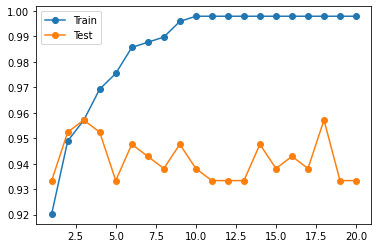

In [17]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:
    #Instantiating the Decision tree classifier
    model = DecisionTreeClassifier(max_depth=i)
    #train the model using training data only
    model.fit(x_train, y_train)
    #Predict TRAIN data
    train_preds = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_preds)
    train_scores.append(train_acc)
    #Predict TEST data
    test_preds = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_preds)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

<h4>Based on the above graph, there is no stable accuracy test score after a depth of level 3, an oscillation on the test accuracy score is observed by incrementing the depth therefore it can be concluded that the model is having troubles learning the dataset appropriately!

Additional data may be required, also ensemble methods should be added for further improvements of this model!</h4>

<h4>In general, a pattern where the test set improves until a certain point and then drops in accuracy, whereas the train performance continues to improve. Although this looks that happens after level 3, there are alot of oscilations after that which makes us understand it's not stable!</h4>

# Trying the same thing on a different dataset

In [20]:
df = pd.read_csv('Churn_Modelling.csv')

In [21]:
df.columns = [x.upper() for x in df.columns]

In [22]:
dummies = pd.get_dummies(df['GEOGRAPHY'])
df = pd.concat([df, dummies], axis = 1)

In [23]:
df.head(2)

,ROWNUMBER,CUSTOMERID,SURNAME,CREDITSCORE,GEOGRAPHY,GENDER,AGE,TENURE,BALANCE,NUMOFPRODUCTS,HASCRCARD,ISACTIVEMEMBER,ESTIMATEDSALARY,EXITED,France,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1


In [24]:
df.GENDER.replace(['Female', 'Male'],[0, 1],inplace=True)

In [25]:
df.loc[(df.AGE >= 18)&(df.AGE <= 28), 'AGE'] = 0
df.loc[(df.AGE > 28)&(df.AGE <= 38), 'AGE'] = 1
df.loc[(df.AGE > 38)&(df.AGE <= 55), 'AGE'] = 2
df.loc[(df.AGE > 55), 'AGE'] = 3

In [26]:
df = df.drop(['ROWNUMBER','CUSTOMERID', 'SURNAME','GEOGRAPHY'],axis=1);

In [27]:
df.head(2)

,CREDITSCORE,GENDER,AGE,TENURE,BALANCE,NUMOFPRODUCTS,HASCRCARD,ISACTIVEMEMBER,ESTIMATEDSALARY,EXITED,France,Germany,Spain
0,619,0,2,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,2,1,83807.86,1,0,1,112542.58,0,0,0,1


rearrange cols so that class is in the end

In [28]:
df = df[['CREDITSCORE', 'GENDER','AGE','TENURE','BALANCE','NUMOFPRODUCTS','HASCRCARD','ISACTIVEMEMBER','ESTIMATEDSALARY','France','Germany','Spain','EXITED']]

In [29]:
df.head(2)

,CREDITSCORE,GENDER,AGE,TENURE,BALANCE,NUMOFPRODUCTS,HASCRCARD,ISACTIVEMEMBER,ESTIMATEDSALARY,France,Germany,Spain,EXITED
0,619,0,2,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,0,2,1,83807.86,1,0,1,112542.58,0,0,1,0


In [30]:
x = df.iloc[:, :-1] #all columns except the last one
y = df.iloc[:, -1] #the last column

# Scaling data using standardisation, although it's not needed for Decision Trees

In [31]:
def featureNormalization(col):
    mean = np.mean(col, axis = 0)
    std = np.std(col, axis = 0)
    
    x_norm = (col - mean)/std
    
    return x_norm

In [32]:
x = featureNormalization(x)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

>1, train: 0.798, test: 0.790
>2, train: 0.822, test: 0.812
>3, train: 0.822, test: 0.812
>4, train: 0.842, test: 0.833
>5, train: 0.844, test: 0.832
>6, train: 0.854, test: 0.843
>7, train: 0.869, test: 0.846
>8, train: 0.876, test: 0.843
>9, train: 0.884, test: 0.841
>10, train: 0.893, test: 0.834
>11, train: 0.903, test: 0.836
>12, train: 0.916, test: 0.818
>13, train: 0.928, test: 0.820
>14, train: 0.942, test: 0.807
>15, train: 0.955, test: 0.803
>16, train: 0.966, test: 0.797
>17, train: 0.975, test: 0.785
>18, train: 0.982, test: 0.792
>19, train: 0.987, test: 0.791
>20, train: 0.991, test: 0.790


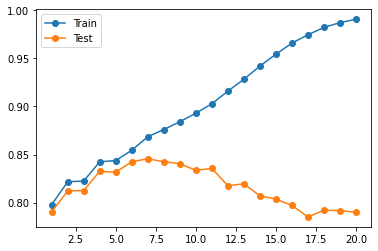

In [34]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:
    #model instantiation
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)
    #Predict TRAIN data
    train_pred = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    #Predict TEST data
    test_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

<h3>As mentioned, overfitting may occur when initially both train and test scores improve, and then at a certain point the accuracy of test score will drop, on the other hand the train score will continue to rise. In this case the training should stop at the point where performance gets worse on the test set.

In the above figure, this happens at a depth of 7, after that the model tends to overfitt the model with training data, but fails to generalise on test (unseen) data!</h3>